In [43]:
# standard
import pandas as pd
import numpy as np
import random

# tf and keras
import tensorflow as tf
import keras
from keras import models
from keras import layers
from sklearn.model_selection import train_test_split
from sklearn import ensemble

# plots
import seaborn as sns
import matplotlib.pyplot as plt

random.seed(2)

In [122]:
# This is reading the cleaned dataframe from the cleaning notebook
df = pd.read_csv('./data/nn.csv')
pd.options.display.max_columns = None

In [201]:
df = df[~df.landtaxvaluedollarcnt.isnull()]
df = df[~df.taxamount.isnull()]
df = df[~df.regionidzip.isnull()]
df = df[~df.structuretaxvaluedollarcnt.isnull()]

In [227]:
df.propertylandusetypeid.nunique()

14

In [202]:
df.isnull().sum().sort_values(ascending=False)

buildingclasstypeid             167204
finishedsquarefeet13            167176
storytypeid                     167142
basementsqft                    167142
yardbuildingsqft26              167070
fireplaceflag                   166841
architecturalstyletypeid        166767
typeconstructiontypeid          166713
finishedsquarefeet6             166434
decktypeid                      165975
poolsizesum                     165397
pooltypeid10                    165021
pooltypeid2                     164985
hashottuborspa                  162771
taxdelinquencyyear              162561
taxdelinquencyflag              162561
yardbuildingsqft17              162246
finishedsquarefeet15            160664
finishedfloor1squarefeet        154377
finishedsquarefeet50            154377
fireplacecnt                    149361
threequarterbathnbr             145218
pooltypeid7                     136063
poolcnt                         133813
numberofstories                 129129
airconditioningtypeid    

In [228]:
X = df[['bedroomcnt','roomcnt','bathroomcnt','taxamount','landtaxvaluedollarcnt','taxvaluedollarcnt','structuretaxvaluedollarcnt',
        'taxvaluedollarcnt','landtaxvaluedollarcnt',  'regionidzip', 'propertylandusetypeid']]
Y = df.logerror

In [229]:
X=pd.get_dummies(X, columns=['regionidzip','propertylandusetypeid'], dtype=int)

In [230]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1234)

X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.25, random_state=1234)

In [231]:
# Applying standardization to inputs
X_train_std = (X_train - X_train.mean())/X_train.std()
X_val_std = (X_val - X_train.mean())/X_train.std()
X_test_std = (X_test - X_train.mean())/X_train.std()

# Applying standardization to outputs
Y_train_std = (Y_train - Y_train.mean())/Y_train.std()
Y_val_std = (Y_val - Y_train.mean())/Y_train.std()
Y_test_std = (Y_test - Y_train.mean())/Y_train.std()

"""X_train_std = X_train
X_val_std = X_val
Y_train_std = Y_train
Y_val_std = Y_val"""

'X_train_std = X_train\nX_val_std = X_val\nY_train_std = Y_train\nY_val_std = Y_val'

In [217]:
avg_error = Y_val_std.mean()
#y_true = np.array(Y)
#y_pred = np.ones(len(Y_val_std)) * avg_error
y_pred = np.zeros(len(Y_val_std)) * avg_error

def get_loss(y_pred, y_true):
    return tf.keras.losses.MAE(
    y_true, y_pred).numpy()

get_loss(y_pred,Y_val_std)

0.42480575912518204

In [208]:
def build_model(num_features, lr):
    """Return a simple logistic regression model using the Keras Sequential API."""
  # Clear session and set a random seed for consistent behavior.
    tf.random.set_seed(1234)
    
  # Use Keras Sequential API to build a logistic regression
    model = keras.Sequential()
    
    # create input layer
    model.add(tf.keras.Input(shape=(num_features,), name='Input'))

    model.add(layers.Dense(1000, activation='relu'))


    # create output layer
    model.add(tf.keras.layers.Dense(
          activation = None,           # linear activation is used
          units=1,                     # output dim
          use_bias=True,              # do not use a bias (intercept) param (see how fixed effects have been added to the model)
          kernel_initializer=tf.ones_initializer,  # initialize params to 1
          bias_initializer='ones'
      ))
  
  # Use Categorical Crossentropy as our loss and the SGD optimizer.
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
        loss='mae',
        metrics=['mae']
    )
    return model

Epoch 1/5
1004/1004 ━━━━━━━━━━━━━━━━━━━━ 13s 11ms/step - loss: 0.9335 - mae: 0.9335 - val_loss: 0.4549 - val_mae: 0.4549
Epoch 2/5
1004/1004 ━━━━━━━━━━━━━━━━━━━━ 19s 9ms/step - loss: 0.4334 - mae: 0.4334 - val_loss: 0.4216 - val_mae: 0.4216
Epoch 3/5
1004/1004 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - loss: 0.4224 - mae: 0.4224 - val_loss: 0.4216 - val_mae: 0.4216
Epoch 4/5
1004/1004 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - loss: 0.4224 - mae: 0.4224 - val_loss: 0.4216 - val_mae: 0.4216
Epoch 5/5
1004/1004 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - loss: 0.4224 - mae: 0.4224 - val_loss: 0.4216 - val_mae: 0.4216
[0.7440910339355469, 0.42297518253326416, 0.4189496636390686, 0.41895586252212524, 0.4189620912075043]


Text(0.5, 1.0, 'Training Loss after each Epoch')

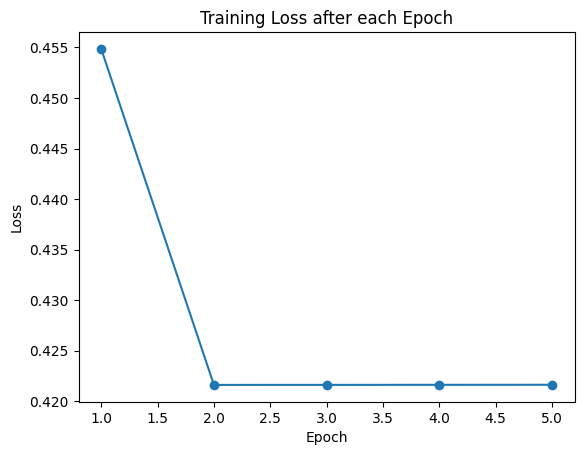

In [232]:
tf.random.set_seed(0)
# 2. Build and compile model

model = build_model(
        num_features=X_train_std.shape[1],
        lr=0.001
    )

# 3. Fit the model
# YOUR CODE HERE

model_fit = model.fit(
      x = X_train_std,
      y = Y_train_std,
      epochs=5,
      batch_size=100, #use some data
      verbose=True,
      validation_data = (X_val_std, Y_val_std))

#print (model_fit.history['loss'])
    
plt.plot(range(1, 6), model_fit.history['val_loss'], marker='o')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title("Training Loss after each Epoch")
plt.show()

In [233]:
X_forest_train_std = model.predict(X_train_std)
X_forest_val_std = model.predict(X_val_std)

3136/3136 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step
1046/1046 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


In [235]:
X_forest_train_std[10:40]

array([[-0.04283076],
       [-0.04283076],
       [-0.04283076],
       [-0.04283076],
       [-0.04283076],
       [-0.04283076],
       [-0.04283076],
       [-0.04283076],
       [-0.04283076],
       [-0.04283076],
       [-0.04283076],
       [-0.04283076],
       [-0.04283076],
       [-0.04283076],
       [-0.04283076],
       [-0.04283076],
       [-0.04283076],
       [-0.04283076],
       [-0.04283076],
       [-0.04283076],
       [-0.04283076],
       [-0.04283076],
       [-0.04283076],
       [-0.04283076],
       [-0.04283076],
       [-0.04283076],
       [-0.04283076],
       [-0.04283076],
       [-0.04283076],
       [-0.04283076]], dtype=float32)

#### Random Forest for when the Predictions from NN are better

In [101]:
clf = ensemble.GradientBoostingRegressor(max_depth=10, random_state=7, n_estimators=64, )
clf.fit(X_forest_train_std, Y_train_std)
train_accuracy = clf.score(X_forest_train_std, Y_train_std)
val_accuracy = clf.score(X_forest_val_std, Y_val_std)
print("Train accuracy:", round(train_accuracy,4))
print("Validation accuracy:", round(val_accuracy,4))
print(get_loss(clf.predict(X_forest_val_std), Y_val_std))

Train accuracy: 0.1746
Validation accuracy: -0.0232
0.4216051096706643


In [115]:
clf = ensemble.RandomForestRegressor(max_depth=50, random_state=7, n_estimators=20, n_jobs=4)
clf.fit(X_forest_train_std, Y_train_std)
train_accuracy = clf.score(X_forest_train_std, Y_train_std)
val_accuracy = clf.score(X_forest_val_std, Y_val_std)
print("Train accuracy:", round(train_accuracy,4))
print("Validation accuracy:", round(val_accuracy,4))
print(get_loss(clf.predict(X_forest_val_std), Y_val_std))

Train accuracy: 0.4271
Validation accuracy: -0.2881
0.5167216070318533


In [94]:
get_loss(clf.predict(X_forest_train_std), Y_train_std)

0.28893871410069283

In [95]:
get_loss(clf.predict(X_forest_val_std), Y_val_std)

0.4941038305116366

In [71]:
print(clf.predict(X_forest_train_std)[10:20])

[-0.063335   -0.03888871 -0.02761343 -0.063335   -0.02761343 -0.063335
  0.68843555 -0.03283435 -0.02992298 -0.02596131]


In [72]:
np.array(Y_val_std)[10:20]

array([-0.51358327,  1.25786755, -0.20299447, -6.97661526,  0.0150899 ,
        0.11177056,  0.23721435, -0.9073431 ,  1.47768007, -0.03864651])